<a href="https://colab.research.google.com/github/alyakhaila/Pemrograman_Python/blob/main/Github2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

3scene/                         coast_cdmc871.jpg  nnmodel_scene/
best_weight_scene_mobileNet.h5  GMB/               TugasAlya.ipynb


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("GMB")
data = []
labels = []

[INFO] loading images...


In [ ]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((162, 162))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10',

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(431, 162, 162, 3)
(144, 162, 162, 3)


In [ ]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(162,162,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 78, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24336)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2433700   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [ ]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

Epoch 1/30
14/14 [==============================] - 5s 369ms/step - loss: 2.3379 - accuracy: 0.1949 - val_loss: 1.5722 - val_accuracy: 0.2014
Epoch 2/30
14/14 [==============================] - 5s 361ms/step - loss: 1.5349 - accuracy: 0.3155 - val_loss: 1.4481 - val_accuracy: 0.3611
Epoch 3/30
14/14 [==============================] - 5s 365ms/step - loss: 1.3523 - accuracy: 0.4640 - val_loss: 1.1905 - val_accuracy: 0.5625
Epoch 4/30
14/14 [==============================] - 5s 363ms/step - loss: 1.1248 - accuracy: 0.5824 - val_loss: 1.0139 - val_accuracy: 0.6389
Epoch 5/30
14/14 [==============================] - 5s 372ms/step - loss: 0.8689 - accuracy: 0.6752 - val_loss: 0.8021 - val_accuracy: 0.7847
Epoch 6/30
14/14 [==============================] - 5s 370ms/step - loss: 0.7207 - accuracy: 0.7541 - val_loss: 0.7494 - val_accuracy: 0.7708
Epoch 7/30
14/14 [==============================] - 5s 371ms/step - loss: 0.5734 - accuracy: 0.8074 - val_loss: 0.6852 - val_accuracy: 0.7292
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


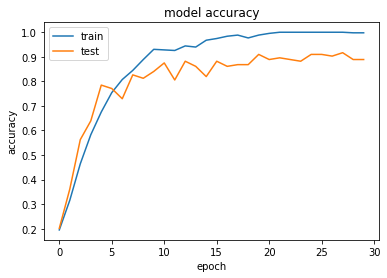

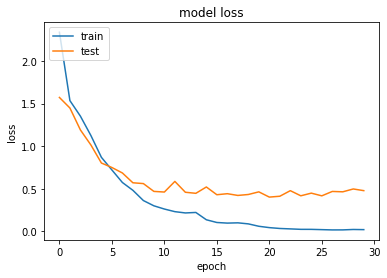

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.90      0.97      0.93        29
      GMB_03       0.81      0.94      0.87        32
      GMB_06       0.83      0.80      0.81        30
      GMB_09       0.97      1.00      0.98        30
      GMB_10       1.00      0.70      0.82        23

    accuracy                           0.89       144
   macro avg       0.90      0.88      0.88       144
weighted avg       0.90      0.89      0.89       144



In [ ]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='gbrdaun.jpg'

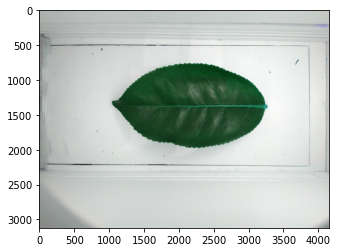

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('gbrdaun.jpg')
image_testing = np.array(image_testing.resize((162, 162))) / 255.0
image_testing.shape

(162, 162, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 162, 162, 3)


In [ ]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[3.6042434e-04 8.4078029e-02 3.5194468e-04 9.1294652e-01 2.2631970e-03]]
['GMB_09']
